In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import collections
import fuzzywuzzy
from pandas_profiling import ProfileReport


In [2]:
train = pd.read_csv('BRI hackthon/train.csv')
test = pd.read_csv('BRI hackthon/test.csv')
description = pd.read_csv('BRI hackthon/data_description.csv')

In [3]:
description

,Kolom,Keterangan
0,job_level,Level Jabatan Pekerja
1,job_duration_in_current_job_level,Masa Kerja pada job level saat ini
2,person_level,Level personal Pekerja
3,job_duration_in_current_person_level,Masa Kerja pada person level saat ini
4,job_duration_in_current_branch,Masa Kerja pada unit kerja saat ini
5,Employee_type,"Tipe Pekerja ( 3 tipe Relationship Manager, ti..."
6,gender,Jenis Kelamin
7,age,Usia
8,marital_status_maried(Y/N),Status Pernikahan (Y / N)
9,number_of_dependences,Jumlah anak dalam tanggungan


In [4]:
train.head(3)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0


In [5]:
profile_train = ProfileReport(train)
profile_test = ProfileReport(test)

In [6]:
profile_train.to_file("BRI hackthon/profile train.html")
profile_test.to_file("BRI hackthon/profile test.html")

KeyboardInterrupt: 

<AxesSubplot:>

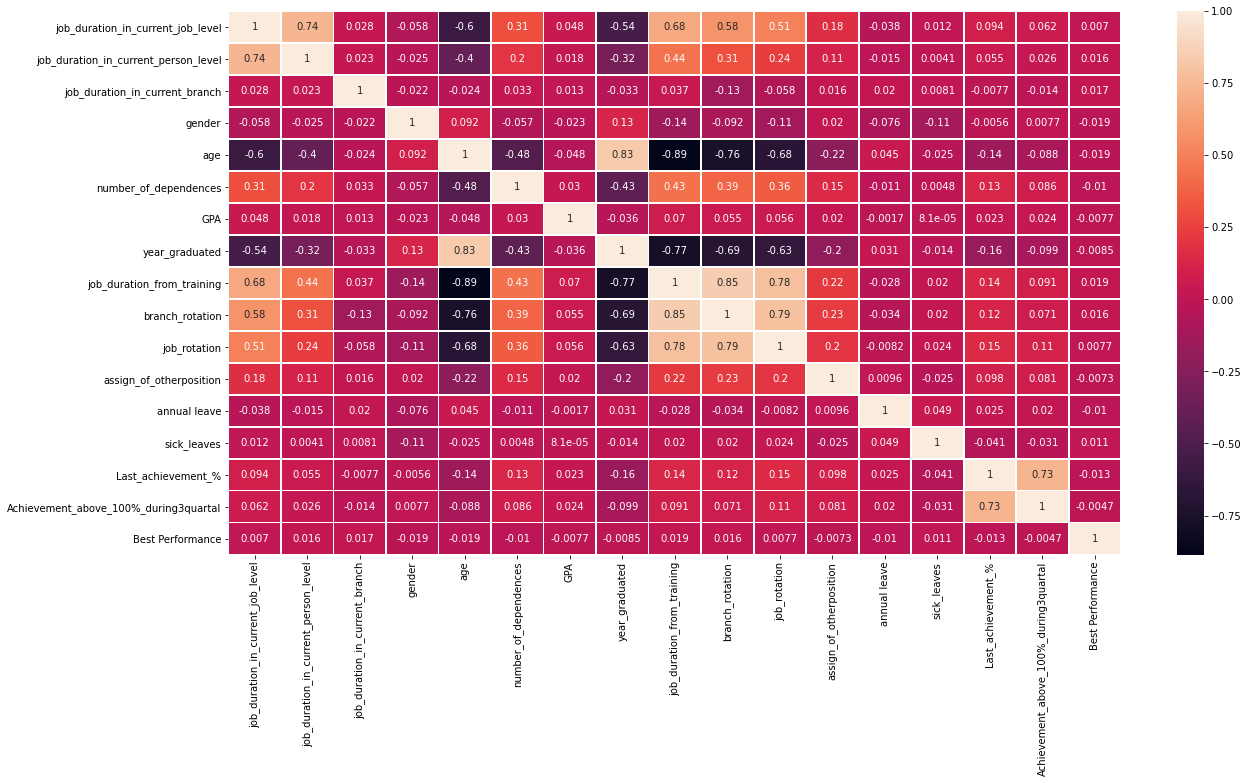

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot =True,linewidth=(0.8))

In [8]:
train.groupby(['job_level','person_level']).mean()['Last_achievement_%']

job_level  person_level
JG03       PG01            59.307895
           PG02            59.933125
           PG03            58.010000
JG04       PG03            71.273065
           PG04            77.730040
           PG05            48.440000
JG05       PG05            85.433987
           PG06            76.630767
           PG07            69.972632
           PG08            43.710000
Name: Last_achievement_%, dtype: float64

In [9]:
train.groupby(['job_rotation']).mean()['Best Performance']

job_rotation
1     0.190476
2     0.149617
3     0.138636
4     0.150161
5     0.139130
6     0.134670
7     0.195584
8     0.162712
9     0.159204
10    0.170455
11    0.117647
12    0.058824
13    0.000000
14    0.000000
15    0.000000
Name: Best Performance, dtype: float64

In [10]:
a = train['annual leave']
b = train['sick_leaves']

c = a+b 

In [24]:
train['jumlah dak hadir']= c

In [20]:
a=  pd.crosstab(train['person_level'],train['job_level'])

In [21]:
a

job_level,JG03,JG04,JG05
person_level,,,
PG01,19,0,0
PG02,16,0,0
PG03,1,9654,0
PG04,0,757,0
PG05,0,2,306
PG06,0,0,378
PG07,0,0,19
PG08,0,0,1


In [32]:
train.groupby(['sick_leaves']).mean()['Last_achievement_%']

sick_leaves
0      72.963599
1      71.139057
2      72.109186
3      70.029800
4      71.193566
5      71.050155
6      70.034964
7      67.101616
8      70.261563
9      69.085610
10     68.728571
11     67.956786
12     67.218182
13     70.429375
14     70.223000
15     61.743636
16     72.677778
17     67.466000
18     53.860000
19     54.246667
20     50.523333
21     76.020000
22     79.995000
23     80.696667
25     44.130000
26    112.230000
27     72.560000
28     50.655000
29     79.940000
30     61.290000
31     83.630000
32     81.330000
36     74.590000
37     64.360000
46     81.080000
47     43.480000
53     74.270000
55     73.450000
77     39.820000
Name: Last_achievement_%, dtype: float64

In [28]:
train.groupby(['Employee_type']).mean()['Last_achievement_%']

Employee_type
RM_type_A    75.416895
RM_type_B    65.083754
RM_type_C    74.265514
Name: Last_achievement_%, dtype: float64

In [40]:
train[train['GPA']==0]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Jumlah dak hadir,jmlah dak hadir,jumlah dak hadir
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,9,6,2,1,40.73,0.0,0,3,3,3
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,6,0,4,10,47.42,0.0,1,14,14,14
5,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,...,9,4,0,0,48.46,0.0,0,0,0,0
6,JG05,2.828427,PG06,2.345208,2.102380,RM_type_A,1,1969,Y,2,...,6,2,8,0,60.38,0.0,0,8,8,8
7,JG05,2.828427,PG06,2.236068,1.581139,RM_type_C,2,1968,Y,2,...,8,1,3,4,14.71,0.0,0,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,JG04,2.828427,PG04,2.449490,1.224745,RM_type_A,2,1968,Y,1,...,7,2,3,0,99.38,3.0,0,3,3,3
11115,JG04,1.118034,PG03,1.118034,1.526434,RM_type_B,1,1989,Y,0,...,2,0,5,1,41.53,0.0,0,6,6,6
11127,JG04,1.224745,PG03,1.224745,0.000000,RM_type_B,2,1982,Y,1,...,2,0,4,0,52.74,0.0,0,4,4,4
11135,JG04,1.224745,PG03,1.224745,0.707107,RM_type_B,1,1986,N,0,...,2,0,2,0,39.00,0.0,0,2,2,2


In [ ]:
train[train['GPA']==0]['Best Performance'].describe()

In [45]:
test123 = train[train['GPA']!=0]
test123 = test123.reset_index().drop('index',axis=1)

In [46]:
test123

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Jumlah dak hadir,jmlah dak hadir,jumlah dak hadir
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,3,2,3,0,46.37,0.0,0,3,3,3
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,3,0,0,1,47.68,0.0,0,1,1,1
2,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,8,2,3,0,47.18,0.0,0,3,3,3
3,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,1,1989,Y,0,...,2,0,9,0,26.76,0.0,0,9,9,9
4,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,2,1991,N,0,...,2,0,3,0,41.45,0.0,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,3,0,4,1,50.87,0.0,0,5,5,5
9001,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2,0,6,0,79.91,0.0,0,6,6,6
9002,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2,0,4,0,78.38,0.0,0,4,4,4
9003,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,4,0,4,1,85.94,1.0,0,5,5,5


In [49]:
test123.corr()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Jumlah dak hadir,jmlah dak hadir,jumlah dak hadir
job_duration_in_current_job_level,1.000000,0.731518,0.031124,-0.054454,-0.570207,0.289725,0.057289,-0.493748,0.656885,0.573936,0.487284,0.177015,-0.044447,0.011289,0.088209,0.061094,0.005265,-0.022899,-0.022899,-0.022899
job_duration_in_current_person_level,0.731518,1.000000,0.028095,-0.017068,-0.350702,0.177009,0.022532,-0.247216,0.395621,0.280540,0.198856,0.098508,-0.017298,0.003592,0.047289,0.020351,0.016000,-0.009465,-0.009465,-0.009465
job_duration_in_current_branch,0.031124,0.028095,1.000000,-0.025051,-0.027695,0.034937,0.013300,-0.034166,0.038286,-0.130693,-0.061075,0.012849,0.018936,0.009647,-0.018174,-0.016531,0.015337,0.019731,0.019731,0.019731
gender,-0.054454,-0.017068,-0.025051,1.000000,0.093179,-0.058880,-0.027396,0.137148,-0.131531,-0.085070,-0.111766,0.021152,-0.076793,-0.112518,-0.008670,0.004083,-0.014342,-0.130662,-0.130662,-0.130662
age,-0.570207,-0.350702,-0.027695,0.093179,1.000000,-0.462424,-0.064885,0.811272,-0.876493,-0.749433,-0.669976,-0.228412,0.057717,-0.030052,-0.139009,-0.085603,-0.010310,0.019113,0.019113,0.019113
number_of_dependences,0.289725,0.177009,0.034937,-0.058880,-0.462424,1.000000,0.038308,-0.412501,0.422520,0.372077,0.334467,0.163119,-0.018310,0.004585,0.132074,0.081584,-0.011143,-0.009478,-0.009478,-0.009478
GPA,0.057289,0.022532,0.013300,-0.027396,-0.064885,0.038308,1.000000,-0.052458,0.090609,0.067211,0.066708,0.026829,-0.002752,0.000469,0.019417,0.020799,-0.006489,-0.001576,-0.001576,-0.001576
year_graduated,-0.493748,-0.247216,-0.034166,0.137148,0.811272,-0.412501,-0.052458,1.000000,-0.727946,-0.673902,-0.617298,-0.209040,0.046349,-0.020441,-0.159690,-0.100999,0.002080,0.017897,0.017897,0.017897
job_duration_from_training,0.656885,0.395621,0.038286,-0.131531,-0.876493,0.422520,0.090609,-0.727946,1.000000,0.850762,0.778300,0.239229,-0.038770,0.025173,0.142875,0.094200,0.017414,-0.009398,-0.009398,-0.009398
branch_rotation,0.573936,0.280540,-0.130693,-0.085070,-0.749433,0.372077,0.067211,-0.673902,0.850762,1.000000,0.784060,0.234374,-0.043546,0.022098,0.115159,0.068760,0.019684,-0.014818,-0.014818,-0.014818


In [59]:
train[train['Education_level']=='level_1']['GPA'].describe()

count    140.000000
mean       6.766000
std       18.977287
min        0.000000
25%        0.000000
50%        0.000000
75%        0.740000
max      155.000000
Name: GPA, dtype: float64